In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

## LOADING AND CHECKING THE BASIC DETAILS OF THE TRAINING DATASET

In [2]:
data_train=pd.read_csv('train.csv')
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data_train.shape

(8523, 12)

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


***


# Exploratory Data Analysis

## HISTOGRAM

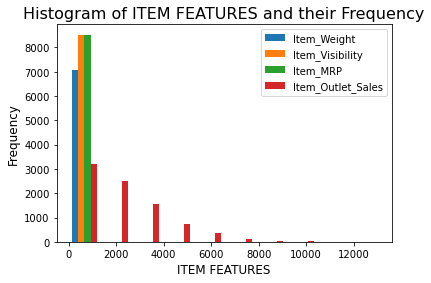

In [7]:
plt.hist([data_train['Item_Weight'], data_train['Item_Visibility'], data_train['Item_MRP'], data_train['Item_Outlet_Sales']])
plt.legend(['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'])
plt.xlabel('ITEM FEATURES',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Histogram of ITEM FEATURES and their Frequency',fontsize=16)
plt.show()

# Checking for correlation in the data

In [8]:
corrmatrix=data_train.corr()

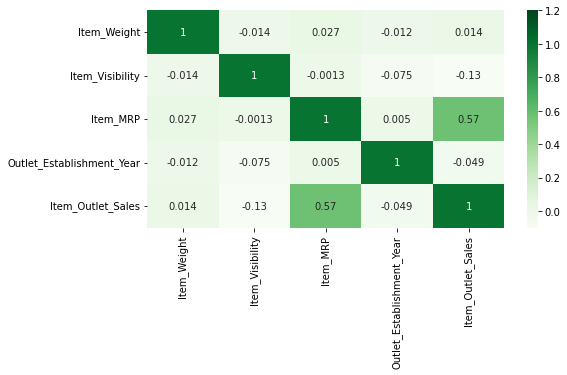

In [9]:
#Plotting the heat map
plt.subplots(figsize=(8,4))
sns.heatmap(corrmatrix,vmin=-0.1, vmax= 1.2,annot=True,cmap='Greens')
plt.show()

In [10]:
#maximum corelation value is 0.57 and minimum is -0.075

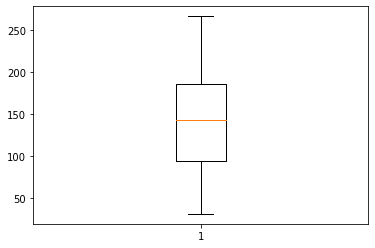

In [11]:
plt.boxplot(data_train['Item_MRP'])
plt.show()

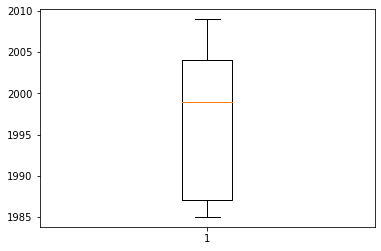

In [12]:
plt.boxplot(data_train['Outlet_Establishment_Year'])
plt.show()

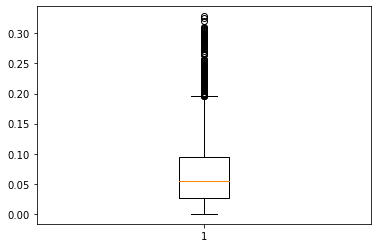

In [13]:
plt.boxplot(data_train['Item_Visibility'])
plt.show()

In [14]:
# As we are predicting the value the outliers are not dropped from the dataset as rows cannot be dropped

***

# Pre-processing

## CHECKING THE NULL VALUES IN THE DATASET

In [15]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

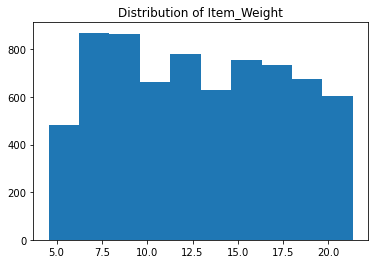

In [16]:
plt.hist(data_train['Item_Weight'])
plt.title('Distribution of Item_Weight')
plt.show()

### From the distribution it is understood that Data in age column is uniformly distributed. So we use mean to fill the null values

In [17]:
mean = data_train['Item_Weight'].mean() 
data_train['Item_Weight'].fillna(mean, inplace =True)

### The Outlet_Size column need to be filled. The Outlet_Size Column is a categorical one so we use mode for filling column

In [18]:
mode = data_train['Outlet_Size'].mode()
data_train['Outlet_Size'].fillna(mode[0], inplace =True)

In [19]:
data_train['Item_Identifier'].nunique()

1559

In [20]:
data_train['Outlet_Identifier'].nunique()

10

## These columns contains lot of unique values so we drop it

In [21]:
data_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

## ONE HOT ENCODING

In [22]:
data_train = pd.get_dummies(data_train)

## Train test splitting of the dataset

In [23]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data_train, test_size = 0.2,random_state=42)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

### MIN MAX SCALING OF THE DATA SET

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

## Importing the model checking matrices

In [25]:
from sklearn.metrics import mean_squared_error,r2_score 
from math import sqrt

***

# MODELLING

## MODEL 1- Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [27]:
model_lr=lr.fit(x_train,y_train)

In [28]:
y_pred_lr=model_lr.predict(x_test)

In [29]:
r2_score(y_test,y_pred_lr)

0.5790012937961118

In [30]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

RMSE value is: 1069.7017722461414


## MODEL 2-RandomForest

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model_rf=rf.fit(x_train,y_train)

In [32]:
y_pred_rf=model_rf.predict(x_test)

In [33]:
r2_score(y_test,y_pred_rf)

0.5667918299461232

In [34]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE value is: 1085.1022250554295


## MODEL 3-Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
model3=lasso.fit(x_train,y_train)
y_pred_lasso=model3.predict(x_test)

In [36]:
r2_score(y_test,y_pred_lasso)

0.5787216854281659

In [37]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_lasso)))

RMSE value is: 1070.0569371397899


## MODEL 4-Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=5)
model4=rd.fit(x_train,y_train)
y_pred_rd=model4.predict(x_test)

In [39]:
r2_score(y_test,y_pred_rd)

0.5787248782400092

In [40]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_rd)))

RMSE value is: 1070.052882223103


## MODEL 5- kNN MODEL

In [41]:
from sklearn import neighbors
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred=model.predict(x_test) 
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1498.604864819476
RMSE value for k=  2 is: 1288.7764940693362
RMSE value for k=  3 is: 1227.5916537497803
RMSE value for k=  4 is: 1192.2713055781746
RMSE value for k=  5 is: 1176.544633194326
RMSE value for k=  6 is: 1161.567016828937
RMSE value for k=  7 is: 1150.8728032139663
RMSE value for k=  8 is: 1157.565322773542
RMSE value for k=  9 is: 1163.4184935537958
RMSE value for k=  10 is: 1164.1041390951486
RMSE value for k=  11 is: 1166.2650602893843
RMSE value for k=  12 is: 1165.4150757337654
RMSE value for k=  13 is: 1168.557071457701
RMSE value for k=  14 is: 1173.6638147144108
RMSE value for k=  15 is: 1179.2236648722821
RMSE value for k=  16 is: 1185.4338489714871
RMSE value for k=  17 is: 1185.3611535780517
RMSE value for k=  18 is: 1185.4329740803455
RMSE value for k=  19 is: 1189.078124585403
RMSE value for k=  20 is: 1191.0108543017564


In [42]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) 
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor(9)
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
y_pred_knn=model.predict(x_test)

In [44]:
r2_score(y_test,y_pred_knn)

0.5070006498799422

In [45]:
print("RMSE value is:",np.sqrt(mean_squared_error(y_test,y_pred_knn)))

RMSE value is: 1157.565322773542


### Cross validation of Models

In [46]:
#CV SCORE OF Linear MODEL
from sklearn.model_selection import cross_validate
cvs_rd=cross_validate(model_lr,x_train,y_train,cv=5)
c1=cvs_rd['test_score'].mean()
c1

0.5540164516966601

In [47]:
#CV SCORE OF RandoM FOREST Model
from sklearn.model_selection import cross_validate
cvs_rf=cross_validate(model_rf,x_train,y_train,cv=5)
c2=cvs_rf['test_score'].mean()
c2

0.5536581055025397

In [48]:
#CV Score of Lasso Model
from sklearn.model_selection import cross_validate
cvs_lasso=cross_validate(model3,x_train,y_train,cv=5)
c3=cvs_lasso['test_score'].mean()
c3

0.5547916376515442

In [49]:
#Cv SCore of Ridge model
from sklearn.model_selection import cross_validate
cvs_rd=cross_validate(model4,x_train,y_train,cv=5)
c4=cvs_rd['test_score'].mean()
c4

0.5538960136897454

In [50]:
#CV score of kNN model
from sklearn.model_selection import cross_validate
cvs_knn=cross_validate(model,x_train,y_train,cv=5)
c5=cvs_knn['test_score'].mean()
c5

0.472319404566229

### RANDOM FOREST IS OBTAINED AS THE BEST MODEL FROM Analysis ALSO IT GIVES NON NEGATIVE PREDICTIONS

## LOADING TEST AND SUBMISSION FILES

In [51]:
#reading test and submission files
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

# Preprocessing test dataset

In [52]:
test['Item_Identifier'].nunique()

1543

In [53]:
test['Outlet_Identifier'].nunique()

10

## These columns contains lot of unique values so we drop it

In [54]:
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [55]:
test.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

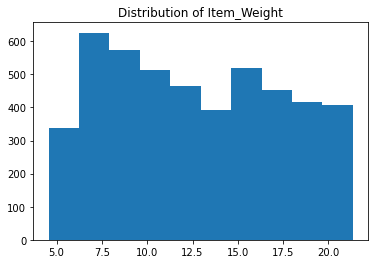

In [56]:
plt.hist(test['Item_Weight'])
plt.title('Distribution of Item_Weight')
plt.show()

### From the distribution it is understood that Data in age column is uniformly distributed. So we use mean to fill the null values

In [57]:
test['Item_Weight'].fillna(mean, inplace =True)

### USING MODE TO FILL OUTLET SIZE COLUMN AS IT IS A CATEGORICAL ONE

In [58]:
mode = test['Outlet_Size'].mode()
test['Outlet_Size'].fillna(mode[0], inplace =True)

## ONE HOT ENCODING TEST DATA

In [59]:
test = pd.get_dummies(test)

## Scaling the test data


In [60]:
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

### Best model is Random forest ( Model 2).So the Values are predicted by choosing this model.Even though other models gives slightly better scores random forest gives only postive values in item outlet sales column

In [61]:
#predicting on the test set and creating submission file
predict = model_rf.predict(test)
submission['Item_Outlet_Sales'] = predict
submission.to_csv('submit_file1.csv',index=False)

In [62]:

df1=pd.read_csv('submit_file1.csv')

In [63]:
df1

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1761.993094
1,FDW14,OUT017,1326.872820
2,NCN55,OUT010,546.322190
3,FDQ58,OUT017,2453.446368
4,FDY38,OUT027,6311.717420
...,...,...,...
5676,FDB58,OUT046,1940.853606
5677,FDD47,OUT018,2772.264698
5678,NCO17,OUT045,1996.174928
5679,FDJ26,OUT017,4762.440768


In [64]:
df1.set_index('Item_Identifier', inplace=True)

In [65]:
df1

,Outlet_Identifier,Item_Outlet_Sales
Item_Identifier,,
FDW58,OUT049,1761.993094
FDW14,OUT017,1326.872820
NCN55,OUT010,546.322190
FDQ58,OUT017,2453.446368
FDY38,OUT027,6311.717420
...,...,...
FDB58,OUT046,1940.853606
FDD47,OUT018,2772.264698
NCO17,OUT045,1996.174928


In [66]:
df1.to_csv('submit_file1.csv')

## The Submission file is created and all  prediction values from the model is filled in the file

***
***